In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data= pd.read_csv('../input/car-price-prediction/CarPrice_Assignment.csv')

In [3]:
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
data.describe(include=['O'])


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [8]:
data['CarName'] = data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [9]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

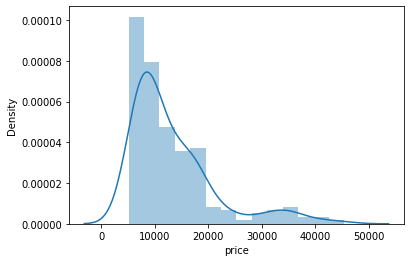

In [10]:
sns.distplot(data['price'],kde=True)

**maximum number of cars are in range of 20000**

<AxesSubplot:xlabel='fueltype', ylabel='price'>

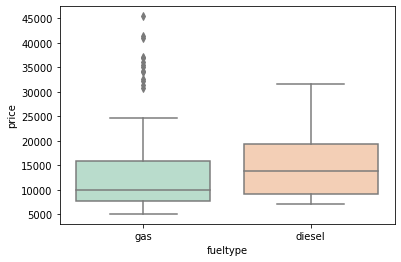

In [11]:
sns.boxplot(x = 'fueltype', y = 'price', data = data,palette='Pastel2')


**there are some outliers in gas vehicles**

<AxesSubplot:xlabel='symboling', ylabel='price'>

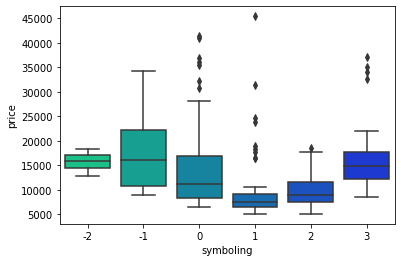

In [12]:
sns.boxplot(x = 'symboling', y = 'price', data = data,palette='winter_r')

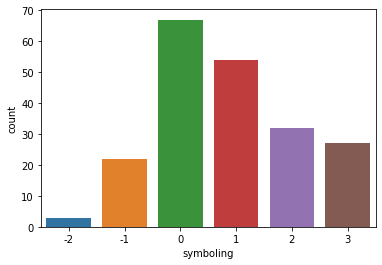

In [13]:
df_v=pd.DataFrame(data['symboling'].value_counts()).reset_index().rename(columns={'index':'symboling','symboling':'count'})
sns.barplot(x='symboling',y='count',data=df_v);

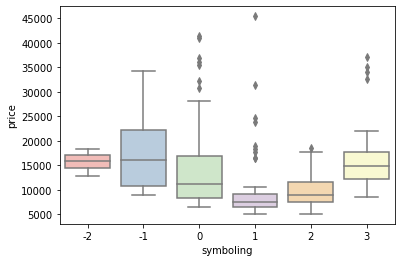

In [14]:
sns.boxplot(x = 'symboling', y = 'price', data = data,palette='Pastel1');


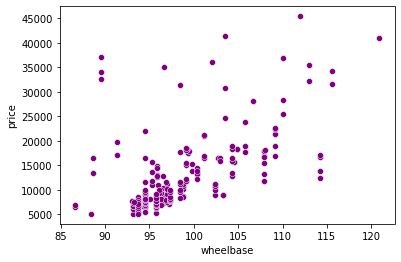

In [15]:
sns.scatterplot(x="wheelbase", y="price", data=data,color='purple');

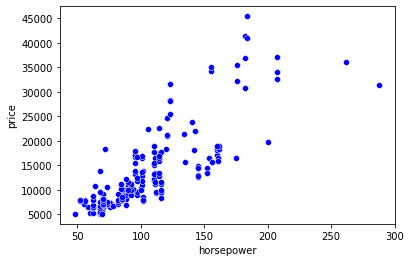

In [16]:
sns.scatterplot(x="horsepower", y="price", data=data,color='b');

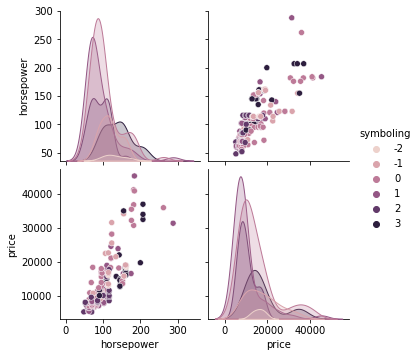

In [17]:
sns.pairplot(data[['horsepower','price','symboling']], hue="symboling");


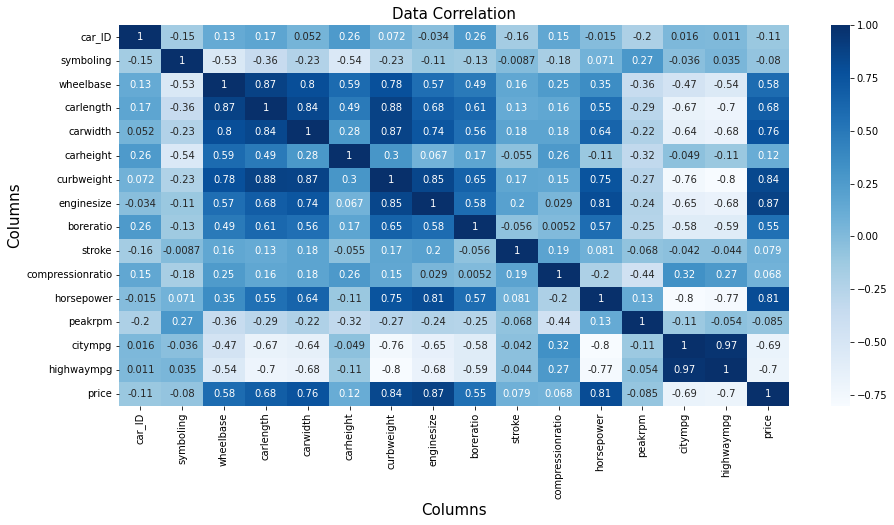

In [18]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,cmap="Blues")
plt.title("Data Correlation",size=15)
plt.ylabel("Columns",size=15)
plt.xlabel("Columns",size=15)
plt.show()

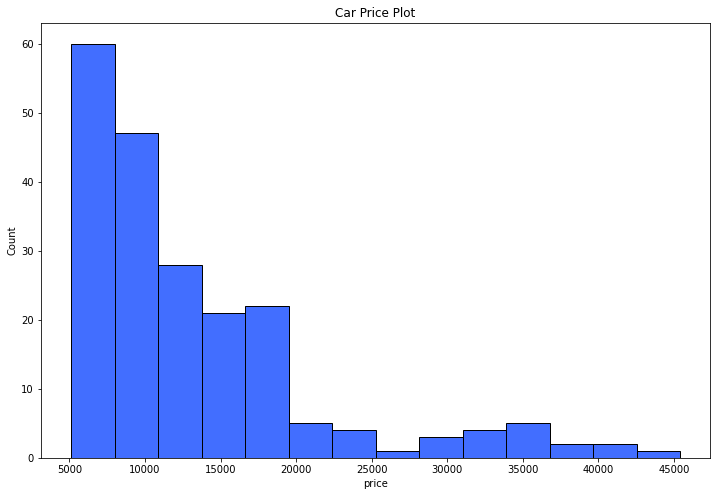

In [19]:
plt.figure(figsize=(12,8))
sns.set_palette('bright')
plt.title('Car Price Plot')
sns.histplot(data['price'])
plt.show()

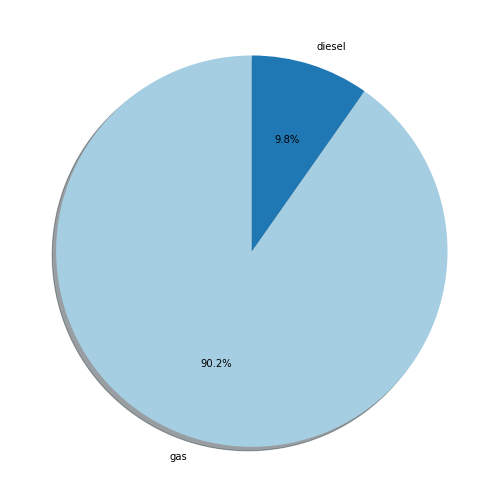

In [20]:
fuel=data['fueltype'].value_counts()
labels=fuel.index
sizes=fuel.values
plt.figure(figsize=(12,9))
colors = sns.color_palette('Paired')
plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True,colors=colors,startangle=90)
plt.show()

In [21]:
data.duplicated().sum()

0

In [22]:
data = pd.get_dummies(data)

In [23]:
X = data.drop(['car_ID','price'],axis=1)
y = data['price']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , r2_score , mean_squared_error
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [25]:
from sklearn.preprocessing import StandardScaler
ros_scaler = StandardScaler()
x_train = ros_scaler.fit_transform(X_train)
x_test = ros_scaler.fit_transform(X_test)

In [26]:
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(X_train)
x_test = ro_scaler.fit_transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train,y_train)
Lr.score(X_test,y_test)


0.828433879804241

In [28]:
Lr.score(X_train,y_train)

0.9970092150836859

In [29]:
print("Test RMSE",np.sqrt(mean_squared_error(y_test,Lr.predict(X_test))))
print("Train RMSE",np.sqrt(mean_squared_error(y_train,Lr.predict(X_train))))
print("R2 Test",r2_score(y_test,Lr.predict(X_test)))

Test RMSE 3963.2426618316767
Train RMSE 409.3866387980518
R2 Test 0.828433879804241


In [30]:
from sklearn.linear_model import Lasso
LO = Lasso()
LO.fit(X_train,y_train)
LO.score(X_test,y_test)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.347e+07, tolerance: 9.190e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.8875083852360282

In [31]:
LO.score(X_train,y_train)


0.9951483832310354

In [32]:
print("Test RMSE",np.sqrt(mean_squared_error(y_test,LO.predict(X_test))))
print("Train RMSE",np.sqrt(mean_squared_error(y_train,LO.predict(X_train))))
print("R2 Test",r2_score(y_test,LO.predict(X_test)))

Test RMSE 3209.1866324399557
Train RMSE 521.4159569953433
R2 Test 0.8875083852360282


In [33]:
from sklearn.linear_model import Ridge
RD = Ridge()
RD.fit(X_train,y_train)
RD.score(X_test,y_test)

0.9288250166050942

In [34]:
RD.score(X_train,y_train)

0.973589576228691

In [35]:
print("Test RMSE",np.sqrt(mean_squared_error(y_test,RD.predict(X_test))))
print("Train RMSE",np.sqrt(mean_squared_error(y_train,RD.predict(X_train))))
print("R2 Test",r2_score(y_test,RD.predict(X_test)))

Test RMSE 2552.6929932944395
Train RMSE 1216.5466257520175
R2 Test 0.9288250166050942
